In [179]:
import pandas as pd
import numpy as np

In [180]:
df=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/DS & ML/Projects/8.jambore/Jambore.xlsx')
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1.0,337.0,118.0,4.0,4.5,4.5,9.65,1.0,0.92
1,2.0,324.0,107.0,4.0,4.0,4.5,8.87,1.0,0.76
2,3.0,316.0,104.0,3.0,3.0,3.5,8.00,1.0,0.72
3,4.0,322.0,110.0,3.0,3.5,2.5,8.67,1.0,0.80
4,5.0,314.0,103.0,2.0,2.0,3.0,8.21,0.0,0.65
...,...,...,...,...,...,...,...,...,...
495,496.0,332.0,108.0,5.0,4.5,4.0,9.02,1.0,0.87
496,497.0,337.0,117.0,5.0,5.0,5.0,9.87,1.0,0.96
497,498.0,330.0,120.0,5.0,4.5,5.0,9.56,1.0,0.93
498,499.0,312.0,103.0,4.0,4.0,5.0,8.43,0.0,0.73


##1. Define Problem statement & Exploratory analysis

###Definition of Problem

**The fetaure of this model is to predict whether a student gets an admission into a specific college or not based on the scores and the capability of a candidate**

###Observations and shape of data

In [181]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1.0,337.0,118.0,4.0,4.5,4.5,9.65,1.0,0.92
1,2.0,324.0,107.0,4.0,4.0,4.5,8.87,1.0,0.76
2,3.0,316.0,104.0,3.0,3.0,3.5,8.00,1.0,0.72
3,4.0,322.0,110.0,3.0,3.5,2.5,8.67,1.0,0.80
4,5.0,314.0,103.0,2.0,2.0,3.0,8.21,0.0,0.65


In [182]:
df.shape

(500, 9)

###Data types

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    float64
 1   GRE Score          500 non-null    float64
 2   TOEFL Score        500 non-null    float64
 3   University Rating  500 non-null    float64
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    float64
 8   Chance of Admit    500 non-null    float64
dtypes: float64(9)
memory usage: 35.3 KB


In [184]:
df.drop(['Serial No.'],axis=1,inplace=True)

**Among all the features, University rating and Research are categorical data**

In [185]:
df['University Rating']=df['University Rating'].astype('category')
df['Research']=df['Research'].astype('category')
df['SOP']=df['SOP'].astype('category')
df['LOR']=df['LOR'].astype('category')

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   GRE Score          500 non-null    float64 
 1   TOEFL Score        500 non-null    float64 
 2   University Rating  500 non-null    category
 3   SOP                500 non-null    category
 4   LOR                500 non-null    category
 5   CGPA               500 non-null    float64 
 6   Research           500 non-null    category
 7   Chance of Admit    500 non-null    float64 
dtypes: category(4), float64(4)
memory usage: 18.8 KB


###Missing value detection

In [187]:
df[df.isna()].count()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

**NO missing values**

###Statistical summary

In [188]:
df.describe(include='all')

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.0,500.0,500.0,500.000000,500.0,500.00000
unique,NaN,NaN,5.0,9.0,9.0,NaN,2.0,NaN
top,NaN,NaN,3.0,4.0,3.0,NaN,1.0,NaN
freq,NaN,NaN,162.0,89.0,99.0,NaN,280.0,NaN
mean,316.472000,107.192000,NaN,NaN,NaN,8.576440,NaN,0.72174
std,11.295148,6.081868,NaN,NaN,NaN,0.604813,NaN,0.14114
min,290.000000,92.000000,NaN,NaN,NaN,6.800000,NaN,0.34000
25%,308.000000,103.000000,NaN,NaN,NaN,8.127500,NaN,0.63000
50%,317.000000,107.000000,NaN,NaN,NaN,8.560000,NaN,0.72000
75%,325.000000,112.000000,NaN,NaN,NaN,9.040000,NaN,0.82000


###Univariate Analysis

**let's see the distribution of continuous variables like GRE, TOEFL score,CGPA,chance of admit**

In [189]:
categorical_columns=df.select_dtypes(include='category').columns
numerical_columns=df.select_dtypes(include='number').columns

In [190]:
import matplotlib.pyplot as plt
import seaborn as sns

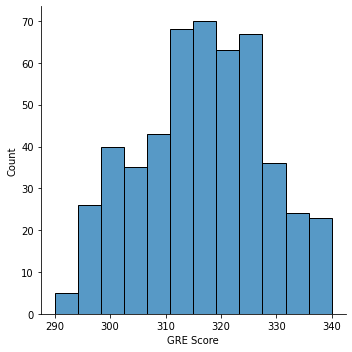

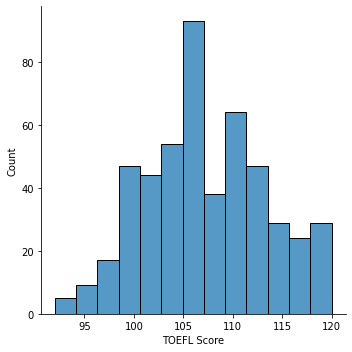

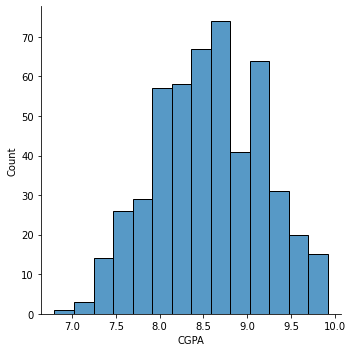

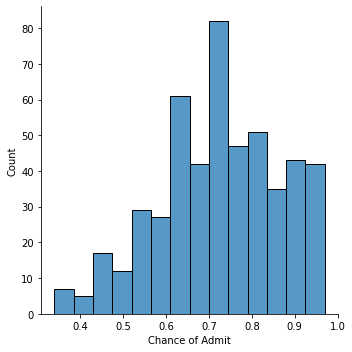

In [191]:
for i in numerical_columns:
  sns.displot(x=i,data=df)
  plt.show()

**The ranges and high frequency or high repetative values can be observed**

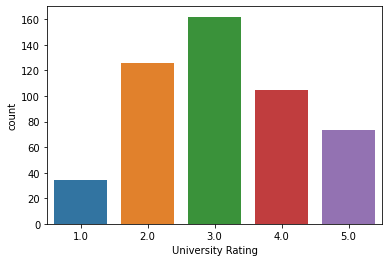

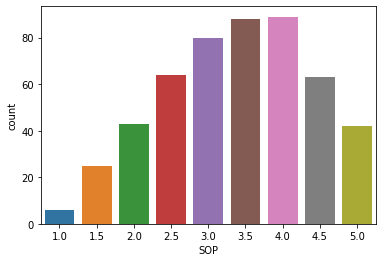

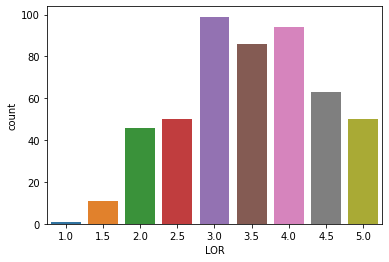

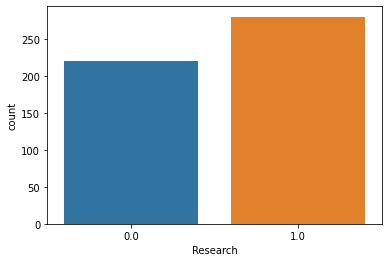

In [192]:
for i in categorical_columns:
  sns.countplot(x=i,data=df)
  plt.show()

**The students with having research is more and the SOP, LOR the value of 3 to 4.0 and university rating of 3 is more**

In [193]:
for i in categorical_columns:
  print(df[i].value_counts(normalize=True))


3.0    0.324
2.0    0.252
4.0    0.210
5.0    0.146
1.0    0.068
Name: University Rating, dtype: float64
4.0    0.178
3.5    0.176
3.0    0.160
2.5    0.128
4.5    0.126
2.0    0.086
5.0    0.084
1.5    0.050
1.0    0.012
Name: SOP, dtype: float64
3.0    0.198
4.0    0.188
3.5    0.172
4.5    0.126
2.5    0.100
5.0    0.100
2.0    0.092
1.5    0.022
1.0    0.002
Name: LOR, dtype: float64
1.0    0.56
0.0    0.44
Name: Research, dtype: float64


###Bivariate analysis

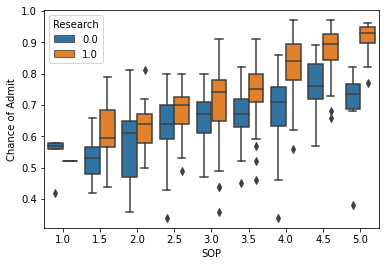

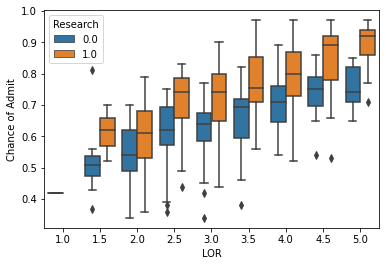

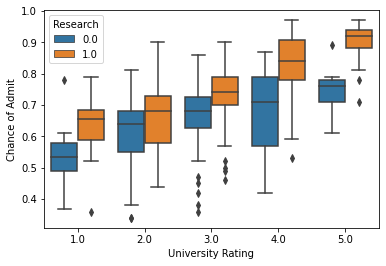

In [194]:
for i in ['SOP','LOR','University Rating']:
  sns.boxplot(x=i,y='Chance of Admit',data=df,hue='Research')
  plt.show()

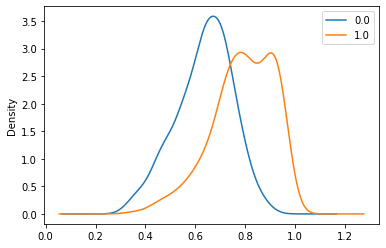

In [195]:
df.groupby(['Research'])['Chance of Admit'].plot.density()
plt.legend();

**It shows the guys with research having more chances of getting admitted or getting good ratings for LOR and SOP**

###Insights

**The GRE score range is 290 to 340 and the most frequent scores are between 310 to 328**

**The TOEFL score range is 90 to 120 and the most frequent score is about 100**

**CGPA is between 6.8 to 10 and mostly occured is between 8 to 9**

**Chance of admit is more of 0.6 to 1**

**The chance of admit increases with SOP, LOR increases and who had done research has higher values of chance of admit**


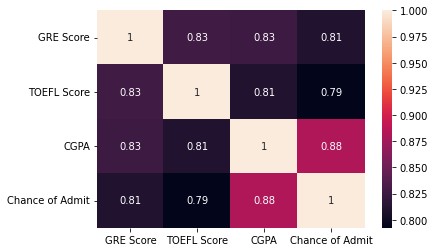

In [196]:
sns.heatmap(df.corr(),annot=True)

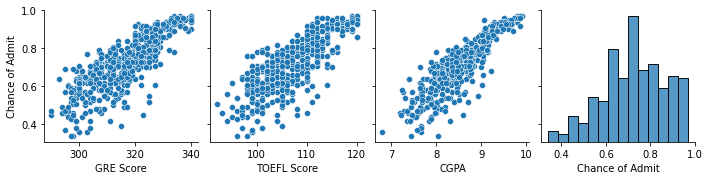

In [197]:
sns.pairplot(df, y_vars=["Chance of Admit"]);

**So, the chance of admit increases with GRE score, TOEFL score, CGPA**

##Data Preprocessing

###Duplicate value check

In [198]:
df[df.duplicated()]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit


**There are no duplicates**

###Missing value treatment

**There are no missing values**

###Outlier treatment

In [199]:
df.describe(include='all')

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.0,500.0,500.0,500.000000,500.0,500.00000
unique,NaN,NaN,5.0,9.0,9.0,NaN,2.0,NaN
top,NaN,NaN,3.0,4.0,3.0,NaN,1.0,NaN
freq,NaN,NaN,162.0,89.0,99.0,NaN,280.0,NaN
mean,316.472000,107.192000,NaN,NaN,NaN,8.576440,NaN,0.72174
std,11.295148,6.081868,NaN,NaN,NaN,0.604813,NaN,0.14114
min,290.000000,92.000000,NaN,NaN,NaN,6.800000,NaN,0.34000
25%,308.000000,103.000000,NaN,NaN,NaN,8.127500,NaN,0.63000
50%,317.000000,107.000000,NaN,NaN,NaN,8.560000,NaN,0.72000
75%,325.000000,112.000000,NaN,NaN,NaN,9.040000,NaN,0.82000


**There are no outliers as it seems every data point is valid**

###Feature Engineering

There are no features which can be added up or derived from the existing features

In [200]:
# df=df2

####Categorical Encoding

In [201]:
from sklearn.preprocessing import OrdinalEncoder

In [202]:
def feature_engineering(df,categorical_columns):
  ordinal_encoding_columns=categorical_columns
  for col in ordinal_encoding_columns:
    from sklearn.preprocessing import OrdinalEncoder
    enc = OrdinalEncoder()
    df[[col]]=enc.fit_transform(df[[col]])
    # df=pd.concat([df,pd.get_dummies(df[col],prefix=col).iloc[:,1:]],axis=1)
    # df = pd.concat([df, pd.get_dummies(df[column]).iloc[: , 1:]], axis=1)
  # df.drop(columns=ordinal_encoding_columns,inplace=True)
  return df

In [203]:
for i in categorical_columns:
  # print([i])
  df=feature_engineering(df,[i])
  # df.head()

In [204]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.0,118.0,3.0,7.0,7.0,9.65,1.0,0.92
1,324.0,107.0,3.0,6.0,7.0,8.87,1.0,0.76
2,316.0,104.0,2.0,4.0,5.0,8.00,1.0,0.72
3,322.0,110.0,2.0,5.0,3.0,8.67,1.0,0.80
4,314.0,103.0,1.0,2.0,4.0,8.21,0.0,0.65
...,...,...,...,...,...,...,...,...
495,332.0,108.0,4.0,7.0,6.0,9.02,1.0,0.87
496,337.0,117.0,4.0,8.0,8.0,9.87,1.0,0.96
497,330.0,120.0,4.0,7.0,8.0,9.56,1.0,0.93
498,312.0,103.0,3.0,6.0,8.0,8.43,0.0,0.73


In [205]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

####Scaling

In [206]:
# from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [207]:
# scaler = StandardScaler()
# df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
# df

In [208]:
# for i in df.columns:
#   print(df[i].max(),df[i].min())

In [209]:
final_df=df
final_df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.0,118.0,3.0,7.0,7.0,9.65,1.0,0.92
1,324.0,107.0,3.0,6.0,7.0,8.87,1.0,0.76
2,316.0,104.0,2.0,4.0,5.0,8.00,1.0,0.72
3,322.0,110.0,2.0,5.0,3.0,8.67,1.0,0.80
4,314.0,103.0,1.0,2.0,4.0,8.21,0.0,0.65


####X and Y separation

In [210]:
X = final_df[final_df.columns.drop('Chance of Admit')]
Y = final_df["Chance of Admit"]

In [211]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [212]:
X_train,X_test

(     GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  Research
 238      310.0        104.0                2.0  2.0  5.0  8.37       0.0
 438      318.0        110.0                0.0  3.0  5.0  8.54       1.0
 475      300.0        101.0                2.0  5.0  3.0  7.88       0.0
 58       300.0         99.0                0.0  4.0  2.0  6.80       1.0
 380      322.0        104.0                2.0  5.0  6.0  8.84       1.0
 ..         ...          ...                ...  ...  ...   ...       ...
 255      307.0        110.0                3.0  6.0  7.0  8.37       0.0
 72       321.0        111.0                4.0  8.0  8.0  9.45       1.0
 396      325.0        107.0                2.0  4.0  5.0  9.11       1.0
 235      326.0        111.0                4.0  7.0  6.0  9.23       1.0
 37       300.0        105.0                0.0  0.0  2.0  7.80       0.0
 
 [400 rows x 7 columns],
      GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  Research
 304      3

In [213]:
Y_train, Y_test

(238    0.70
 438    0.67
 475    0.59
 58     0.36
 380    0.78
        ... 
 255    0.79
 72     0.93
 396    0.84
 235    0.88
 37     0.58
 Name: Chance of Admit, Length: 400, dtype: float64, 304    0.62
 340    0.75
 47     0.89
 67     0.57
 479    0.79
        ... 
 11     0.84
 192    0.86
 92     0.34
 221    0.75
 110    0.61
 Name: Chance of Admit, Length: 100, dtype: float64)

##Model Building

In [214]:
# Scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_standardized = scaler.transform(X_train)
X_test_standardized = scaler.transform(X_test)

In [215]:
X_train_standardized

array([[-0.53736015, -0.51949116, -0.05463584, ...,  0.00933125,
        -0.32658176, -1.11114215],
       [ 0.16363964,  0.44925692, -1.8029826 , ...,  0.00933125,
        -0.04593523,  0.89997486],
       [-1.41360989, -1.0038652 , -0.05463584, ..., -1.05709751,
        -1.13550409, -1.11114215],
       ...,
       [ 0.77701445, -0.03511712, -0.05463584, ...,  0.00933125,
         0.89505605,  0.89997486],
       [ 0.86463943,  0.61071493,  1.69371093, ...,  0.54254563,
         1.09315948,  0.89997486],
       [-1.41360989, -0.35803314, -1.8029826 , ..., -1.59031189,
        -1.26757304, -1.11114215]])

In [216]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(X_train_standardized,Y_train)

output=model.predict(X_test_standardized)

model.coef_,model.intercept_


(array([0.02091007, 0.01965792, 0.00701103, 0.00304937, 0.01352815,
        0.07069295, 0.00988992]), 0.7209250000000001)

In [217]:
model.score(X_train_standardized,Y_train)

0.8215099192361265

In [218]:
model.score(X_test_standardized,Y_test)

0.8208741703103731

In [219]:
# poly=PolynomialFeatures(2)

# X_train_2=poly.fit_transform(X_train)
# X_train_2
# scaler = StandardScaler()
# scaler.fit(X_train_2)
# X_train_2_standardized = scaler.transform(X_train_2)


In [220]:
# X_train_2.shape

In [221]:
import statsmodels.api as sm
X_train_1=pd.DataFrame(X_train_standardized, columns=X_train.columns)
X_train_1.set_index(pd.Index(X_train.index),inplace=True)
# Y_train_1=pd.DataFrame(Y_train,columns=['Chance of Admit']).reset_index().iloc[:,1]

X_sm = sm.add_constant(X_train_1)  #Statmodels default is without intercept, to add intercept we need to add constant 

sm_model = sm.OLS(Y_train, X_sm).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


#### Model statistics & coefficients

In [222]:
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     257.7
Date:                Tue, 01 Nov 2022   Prob (F-statistic):          2.10e-142
Time:                        07:09:31   Log-Likelihood:                 559.27
No. Observations:                 400   AIC:                            -1103.
Df Residuals:                     392   BIC:                            -1071.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7209      0.00

**From the model coefficients and the t statistic values only GRE, TOEFL, LOR, CGPA, Research features are important**

In [223]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

degrees = 6 # number of data-points
train_scores = []
test_scores = []
for degree in range(1, degrees):
  scaler = StandardScaler()
  polyreg_scaled = make_pipeline(PolynomialFeatures(degree), scaler, LinearRegression())
  polyreg_scaled.fit(X_train, Y_train)
  train_score = polyreg_scaled.score(X_train, Y_train)
  test_score = polyreg_scaled.score(X_test, Y_test)
  train_scores.append(train_score)
  test_scores.append(test_score)

In [224]:
train_scores,test_scores

([0.8215099192361265,
  0.8372870402475172,
  0.7894587469834955,
  0.6622897051187593,
  1.0],
 [0.8208741703103731,
  0.8237964531405697,
  0.48668364921591045,
  -9.303401405360034,
  -183.52056018729255])

**By just increasing the degree the r2 score is decreasing and its negative, i.e. it is performing worst than the dumb model**

**From the test scores, the best model is 2 degree model and train, test performance is slightly better than degree 1 model**

####Lasso and Ridge Regression

In [225]:
from sklearn import linear_model
model_train_scores=[]
model_test_scores=[]
model_coefs=[]
model_intercepts=[]

alphas=[0.1,0.05,0.01,0.005,0.001,0.0005,0.0001]
for i in alphas:
  model=linear_model.Lasso(alpha=i)
  model.fit(X_train_standardized,Y_train)
  output=model.predict(X_test_standardized)
  model_coefs.append(model.coef_)
  model_intercepts.append(model.intercept_)
  model_train_scores.append(model.score(X_train_standardized,Y_train))
  model_test_scores.append(model.score(X_test_standardized,Y_test))

max_score_alpha_index=np.argmax(model_test_scores)
alpha=alphas[max_score_alpha_index]
model_test_scores[max_score_alpha_index],model_coefs[max_score_alpha_index],model_intercepts[max_score_alpha_index] 



(0.8207818227394215,
 array([0.02089882, 0.01962888, 0.006992  , 0.00302528, 0.01348122,
        0.07071527, 0.00983233]),
 0.7209250000000001)

In [226]:
from sklearn import linear_model
model_train_scores=[]
model_test_scores=[]
model_coefs=[]
model_intercepts=[]

alphas=[0.1,0.05,0.01,0.005,0.001,0.0005,0.0001]
for i in alphas:
  model=linear_model.Ridge(alpha=i)
  model.fit(X_train_standardized,Y_train)
  output=model.predict(X_test_standardized)
  model_coefs.append(model.coef_)
  model_intercepts.append(model.intercept_)
  model_train_scores.append(model.score(X_train_standardized,Y_train))
  model_test_scores.append(model.score(X_test_standardized,Y_test))

max_score_alpha_index=np.argmax(model_test_scores)
alpha=alphas[max_score_alpha_index]
model_test_scores[max_score_alpha_index],model_coefs[max_score_alpha_index],model_intercepts[max_score_alpha_index]

(0.8208741602027321,
 array([0.02091009, 0.01965794, 0.00701104, 0.00304938, 0.01352815,
        0.07069288, 0.00988992]),
 0.7209250000000001)

##Testing Linear regression assumptions

####Multicollinearity

In [227]:
# VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [228]:
vif = pd.DataFrame()
X_t = pd.DataFrame(X_train_standardized)
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,GRE Score,4.88
5,CGPA,4.75
1,TOEFL Score,4.26
3,SOP,2.92
2,University Rating,2.80
4,LOR,2.08
6,Research,1.51


**There is no relation between the variables and one variable cannot be explained interms of linear relationship with another variable**

####Mean of residuals

In [229]:
np.mean(output-Y_test)

0.0057065916355365405

**The mean of residuals is almost zero**

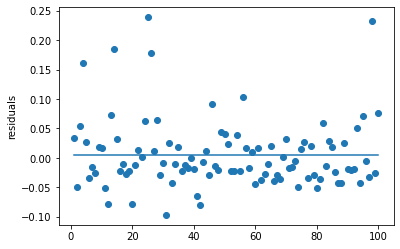

In [230]:
plt.scatter(x=np.array(range(1,101)),y=output-Y_test)
plt.plot(np.array(range(1,101)),[np.mean(output-Y_test)]*100)
plt.ylabel('residuals')
plt.show()

####linearity of variables

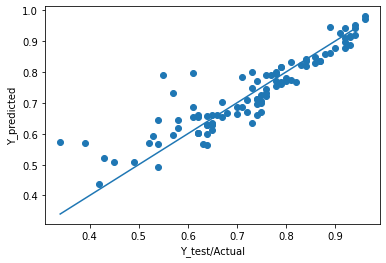

In [231]:
plt.scatter(Y_test,output)
# plt.show()
min=np.min([Y_test.min(),output.min()])
max=np.max([Y_test.max(),output.max()])
plt.plot(np.arange(min,max,0.1),np.arange(min,max,0.1))
plt.xlabel('Y_test/Actual')
plt.ylabel('Y_predicted')
plt.show()

####Test for Homoscedasticity

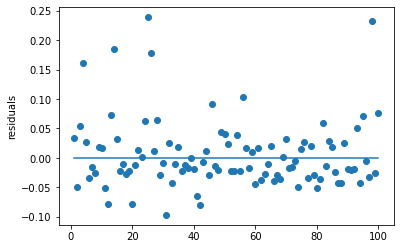

In [232]:
plt.scatter(x=np.array(range(1,101)),y=output-Y_test)
plt.plot(np.array(range(1,101)),[0]*100)
plt.ylabel('residuals')
plt.show()

**There is almost constant variance**

#### normality test

In [233]:
residuals=output-Y_test.values

In [234]:
residuals

array([ 0.0336446 , -0.04956458,  0.05400882,  0.16135824,  0.02719181,
       -0.03486292, -0.01453783, -0.02601738,  0.01873126,  0.01653774,
       -0.05116827, -0.07784847,  0.07221604,  0.18560119,  0.03166887,
       -0.02222985, -0.01081707, -0.0280355 , -0.02251413, -0.0781899 ,
       -0.01156232,  0.01390015,  0.00201561,  0.0621447 ,  0.23876323,
        0.17881676,  0.0116178 ,  0.0643678 , -0.0297299 , -0.00917237,
       -0.09665905,  0.02502109, -0.04226249, -0.00953971,  0.01791175,
       -0.02185026, -0.01279872, -0.0167956 , -0.00043886, -0.01830191,
       -0.06427282, -0.07921251, -0.00765546,  0.01095741, -0.02819392,
        0.09235569, -0.01301546, -0.01970124,  0.04362777,  0.04061795,
        0.02352994, -0.02148646, -0.02172766,  0.03929822, -0.02166665,
        0.10295764,  0.01767252, -0.01665377,  0.00940838, -0.0435315 ,
        0.01763511, -0.03813362, -0.02692968, -0.01087016,  0.02015561,
       -0.03945118, -0.02813741, -0.03604971,  0.00143225,  0.03

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


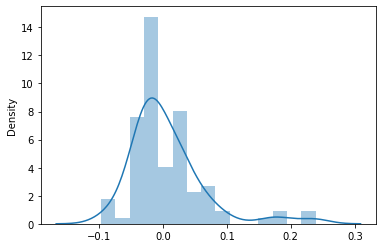

In [235]:
sns.distplot(residuals)

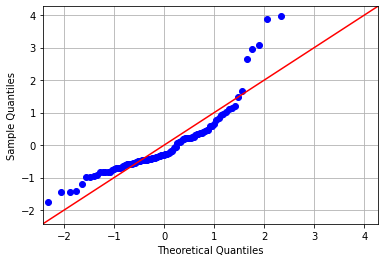

In [236]:
import statsmodels.api as sm
fig = sm.qqplot(residuals, line='45', fit=True)
plt.grid()

**Its not following normal distribution**


##Model performance evaluation

In [237]:
# R2 scoe for train
model.score(X_train_standardized,Y_train)       # for simple linear regrssionmodel

0.8215099192360797

In [238]:
# R2 scoe for test
model.score(X_test_standardized,Y_test)       # for simple linear regrssionmodel

0.8208741602027321

In [239]:
#Adjusted R2 score

1 - (1-model.score(X_train_standardized, Y_train))*(len(Y_train)-1)/(len(Y_train)-X.shape[1]-1)

0.8183225963652955

In [240]:
np.mean((output-Y_test)**2)

0.00345909909232504

In [241]:
# # MSE
# from sklearn.metrics import mean_squared_error
# mean_squared_error(Y_test, output)

In [242]:
# MAE
np.mean(abs(output-Y_test))

0.04020019665553464

###Final comments

**By considering R2 score, normality test, Linear regression is not best option we need another model to predict even better**

##Actionable Insights and recommendations

**1. Among all the variables, the CGPA, GRE score, TOEFL score, LOR, Research are the major predictors and among all CGPA having highest weightage to predict.**

**2. With the given attributes and data, the model performance is moderate. We require even more data points or other attributes like Graduation comleted year, course opted in university, discipline of the candidate, graduated college of the candidate**

**3. With linear regression model, the test assumption of normal residuals is failed, and r2 score is also around 0.82, so, we need even more better model (with degree 2 the r2 score slightly increased, but not to a great extent)**

**4.There are much benefits if we predict out exactly, One can start eductaional training or coaching w.r.t GRE, TOEFL and also provide materials or necessary info to students to help in cracking their exams or college admissions**

**5.One can understand the flow of students who are willing to take up higher studies and plan online edtechs to fulfill their dreams**
